In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from cuml import KMeans
from cuml.metrics.cluster import silhouette_score
import time
%matplotlib inline

In [2]:
df = pd.read_csv("weather_classification_data.csv")
#drop weather type class label
df = df.drop(['Weather Type'], axis=1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [3]:
le = LabelEncoder()
categorical = ['Cloud Cover', 'Season', 'Location']
for variable in categorical:
    df[variable] = le.fit_transform(df[variable])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2


In [4]:
cols = df.columns
ms = MinMaxScaler()
df = ms.fit_transform(df)
df = pd.DataFrame(df, columns=[cols])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0.291045,0.595506,0.195876,0.752294,1.000000,0.527951,0.142857,1.000000,0.175,0.5
1,0.477612,0.853933,0.175258,0.651376,1.000000,0.529480,0.500000,0.333333,0.500,0.5
2,0.410448,0.494382,0.144330,0.146789,0.000000,0.547746,0.357143,0.333333,0.275,1.0
3,0.470149,0.707865,0.030928,0.752294,0.000000,0.566614,0.500000,0.333333,0.050,0.0
4,0.388060,0.606742,0.350515,0.605505,0.666667,0.477461,0.071429,1.000000,0.125,1.0


In [5]:
#hard to determine through elbow method so resort to silhouette method
silhouette_coefficient = []
for i in range(2,31):
    kmeanspp = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeanspp.fit(df)
    silhouette_coefficient.append(silhouette_score(df, kmeanspp.labels_))
    print("k=%d done" % i)

k=2 done
k=3 done
k=4 done
k=5 done
k=6 done
k=7 done
k=8 done
k=9 done
k=10 done
k=11 done
k=12 done
k=13 done
k=14 done
k=15 done
k=16 done
k=17 done
k=18 done
k=19 done
k=20 done
k=21 done
k=22 done
k=23 done
k=24 done
k=25 done
k=26 done
k=27 done
k=28 done
k=29 done
k=30 done


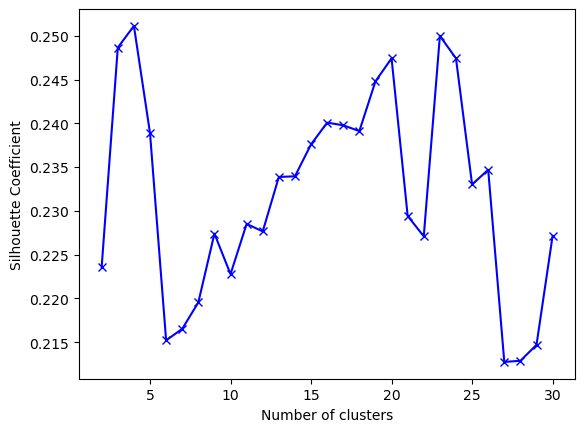

In [6]:
plt.plot(range(2,31), silhouette_coefficient, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [5]:
#determine time taken for k means++
kmeanspp = KMeans(n_clusters=4, init='k-means++', max_iter = 300, n_init = 10, random_state=0) #4 is best from silhouette coefficient
start_time = time.time()
kmeanspp.fit(df)
end_time = time.time()
end_time-start_time

0.35343503952026367

In [6]:
#sum of squared L2 distance
kmeanspp.inertia_

5105.9792115913

In [8]:
#silhouette coefficient
silhouette_score(df, kmeanspp.labels_)

0.2511174356328603